## Script to plot domain and elevation from geo_em.d01.nc file
This is an example for EPICC experiments
This script uses cartopy package for plotting maps

Loading modules required

In [19]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import proplot as plot

import epicc_config as cfg

from matplotlib.ticker import MaxNLocator

from wrf import (to_np, getvar,get_cartopy, cartopy_xlim,GeoBounds,CoordPair,
                 cartopy_ylim, latlon_coords)

%matplotlib inline


Importing geo_em.d01.nc file and variables
Setting map limits and projection based on the input wrf file

In [72]:
#getting geographical info for plotting
geo_filename = '/vg6/dargueso/share/geo_em_files/EPICC/geo_em.d01.EPICC_2km_ERA5_HVC_GWD.nc'
geo_file = xr.open_dataset(geo_filename)
geo_file_hgt = geo_file.HGT_M.squeeze()
geo_file_lm=geo_file.LANDMASK.squeeze()
xbounds = cartopy_xlim(wrfin=nc.Dataset(geo_filename))
ybounds = cartopy_ylim(wrfin=nc.Dataset(geo_filename))
geo_proj = get_cartopy(wrfin=nc.Dataset(geo_filename))

lats = geo_file.XLAT_M.squeeze().values
lons = geo_file.XLONG_M.squeeze().values

geo_proj._threshold /= 100.


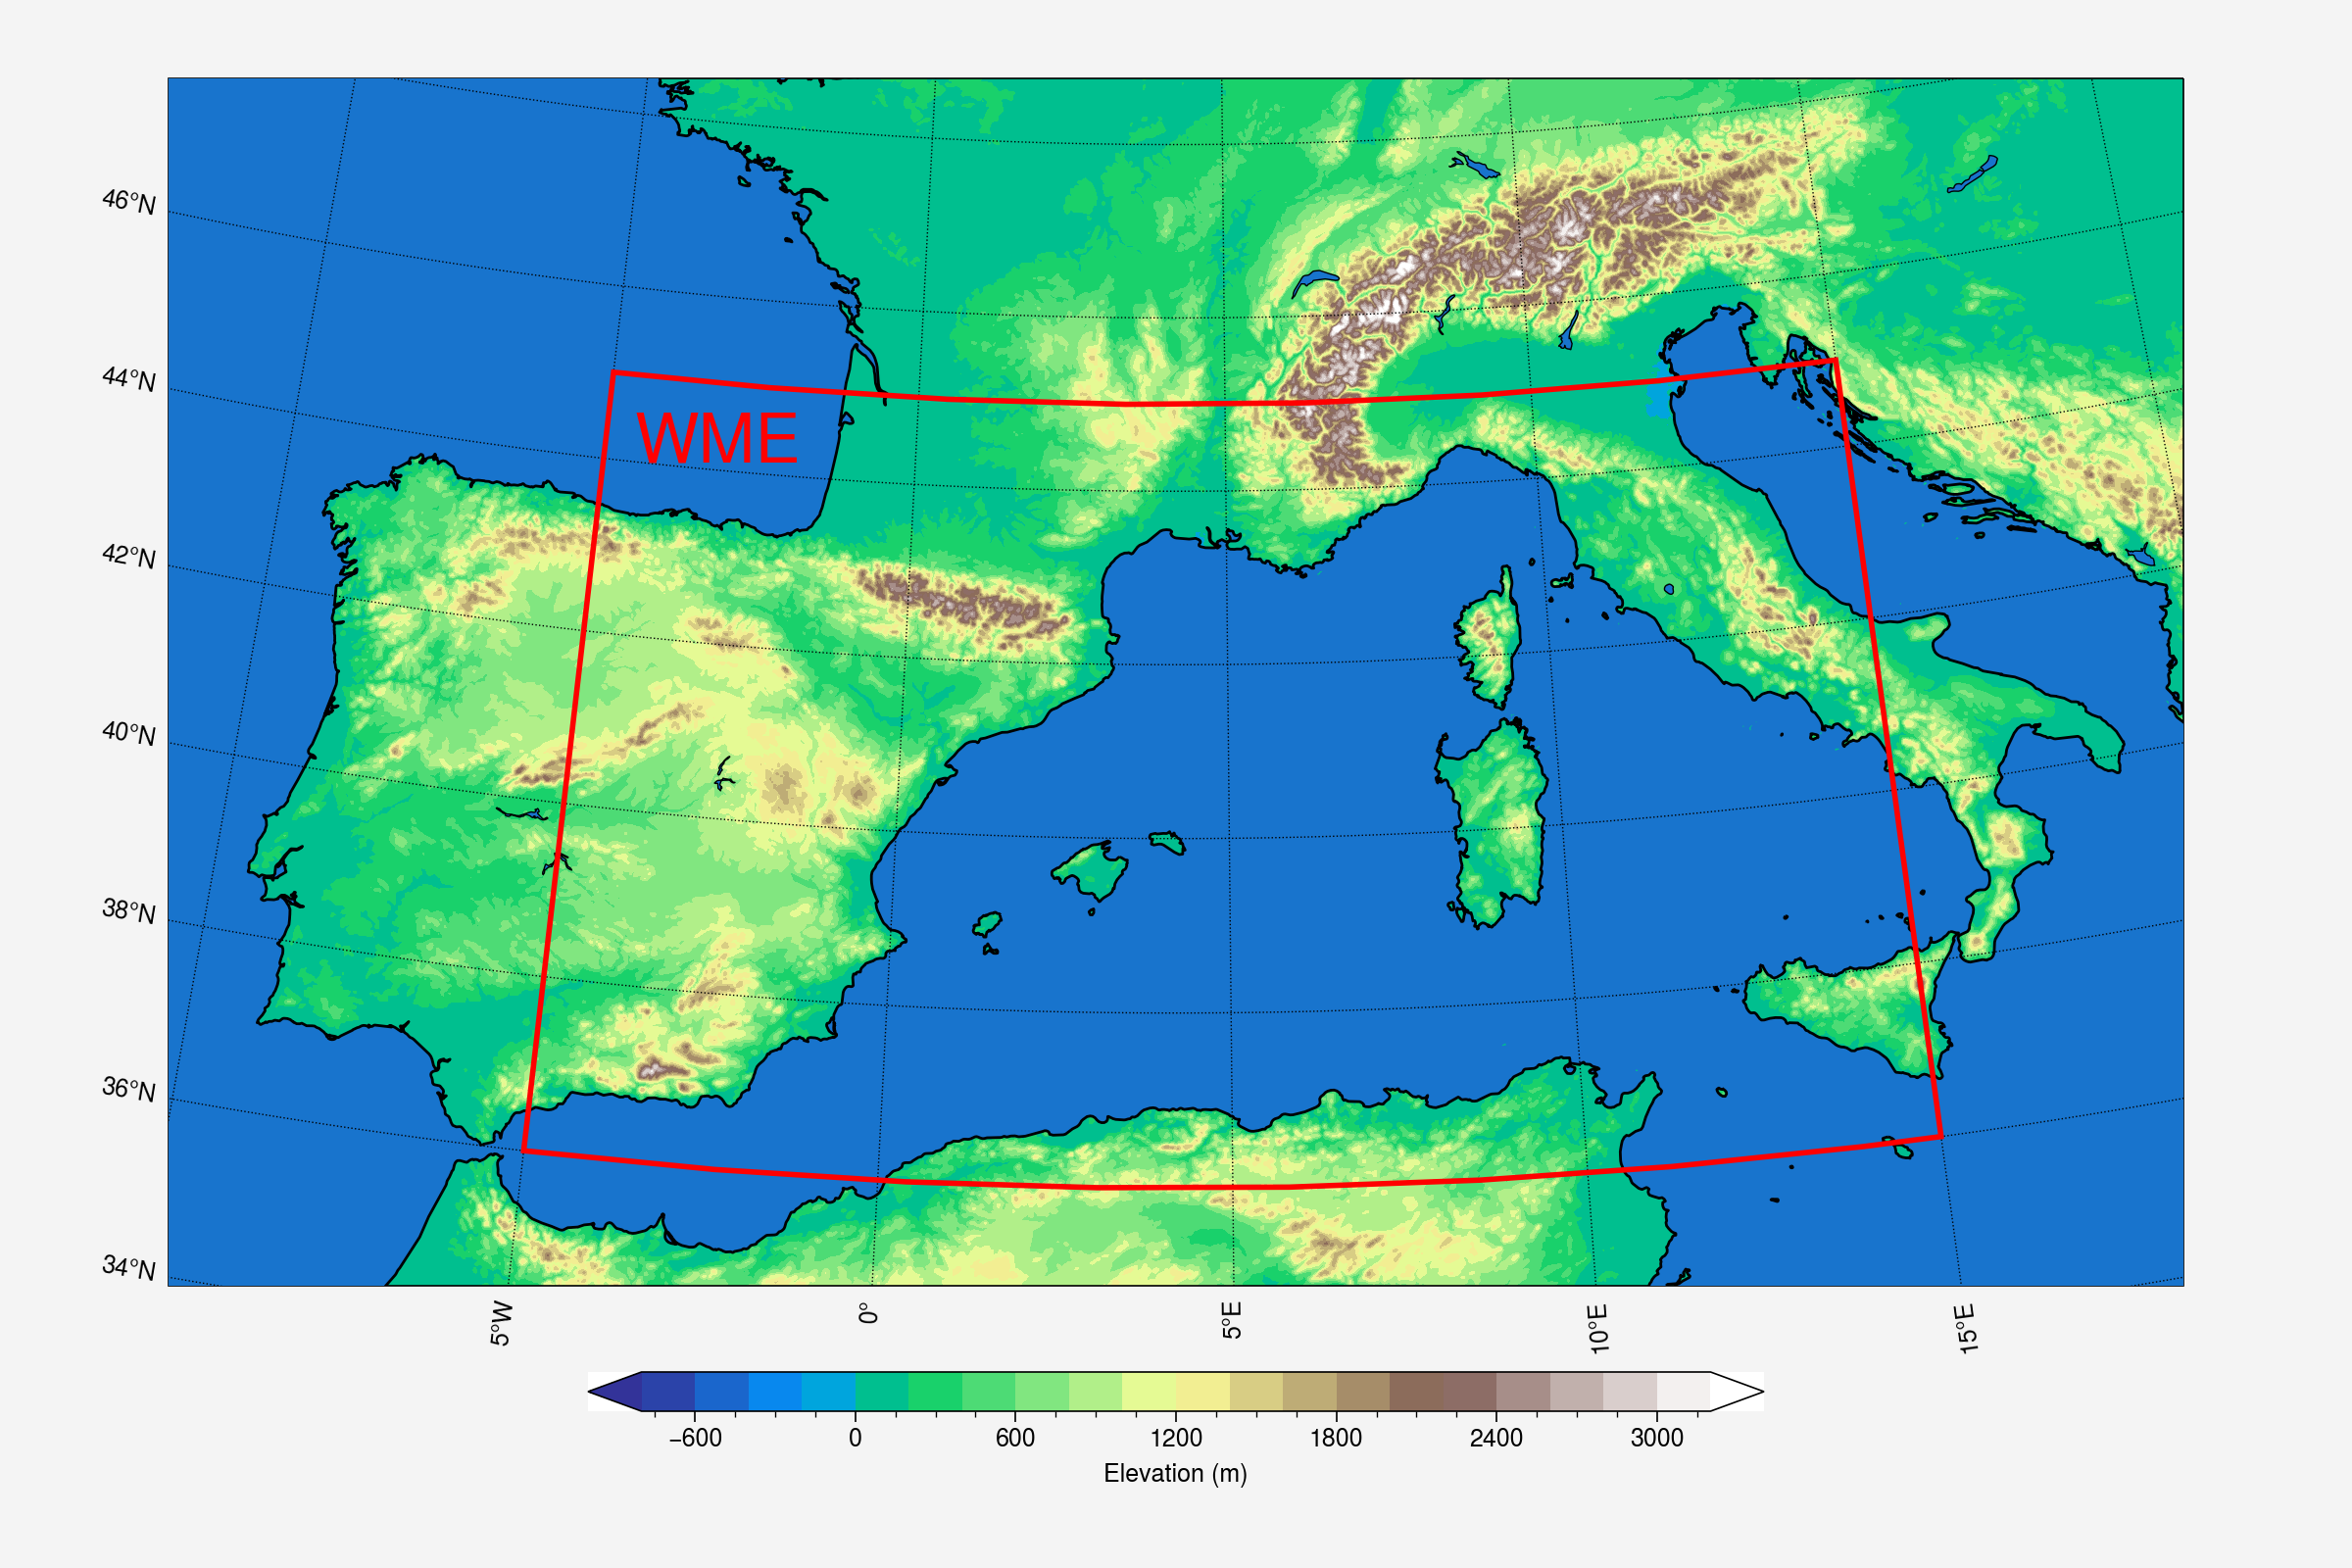

In [105]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1,projection=geo_proj)

ax.coastlines(linewidth=1,zorder=102,resolution='10m')
oce50m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m')
lakes50m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')



ax.add_feature(oce50m , zorder=100,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(lakes50m, zorder=100,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])

ct=ax.contourf(lons,lats,geo_file_hgt,levels=np.arange(-800,3400,200),cmap='terrain',extend='both',transform=ccrs.PlateCarree())

for reg in ['WME']:#,'SWM','NWM']:
    
    lon1=cfg.reg_coords[reg][1]
    lon2=cfg.reg_coords[reg][3]
    lat1=cfg.reg_coords[reg][0]
    lat2=cfg.reg_coords[reg][2]
    
    dom_sq = ax.add_patch(mpatches.Rectangle(xy=[lon1, lat1], width=lon2-lon1, height=lat2-lat1,
                                edgecolor='red',
                                facecolor='none',
                                linewidth=2,
                                zorder=103,
                                transform=ccrs.PlateCarree()))
    
    if reg == 'WME':
        ax.text(lon1+0.5, lat2-1, reg,size=25, color='red', zorder=105,ha='left',transform=ccrs.PlateCarree())
    else:
        ax.text(lon2-0.5, lat2-1, reg,size=20, color='red', zorder=105,ha='right',transform=ccrs.PlateCarree())

    
gl0=ax.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl0.right_labels=False
gl0.top_labels=False   

cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.025])
cbar=plt.colorbar(ct, cax=cbar_ax,orientation="horizontal")
cbar.set_label ('Elevation (m)')
fig.subplots_adjust(left=0.05,right=0.95,top=0.95,bottom=0.18,wspace=0.1,hspace=0.5)


plt.savefig(f'{cfg.path_out}/WRF_General/EPICC_domain_with_regs.png',dpi=150)

